In [1]:
# import necessary libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Read the train and test data
train = pd.read_csv('train.csv', sep =',')
test = pd.read_csv('test.csv', sep =',')
# check shape
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
# look a first 10 rows of training data
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# look a first 10 rows of testing data
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
train['SalePrice'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


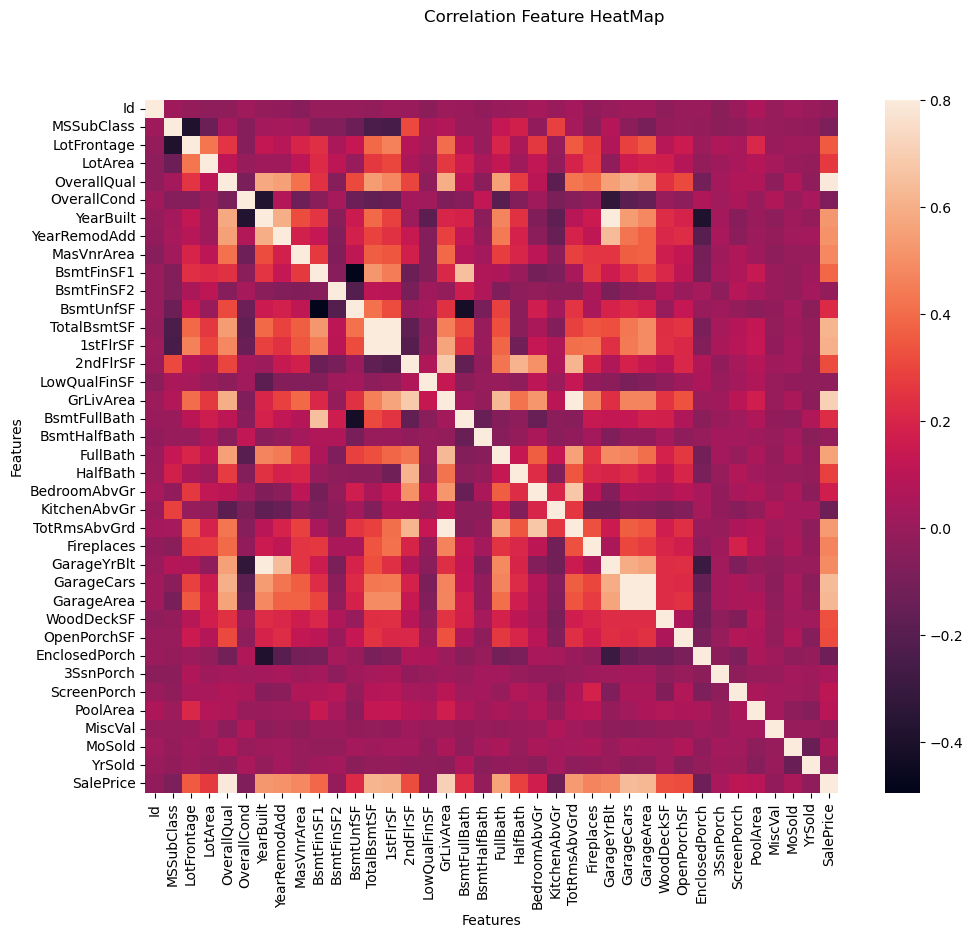

In [9]:
# Assuming train is your DataFrame, There is an aspect of the df that cannot be converted to Float RL so we need to select the numeric data in the column
numeric_columns = train.select_dtypes(include=['float64', 'int64']) # Select numeric columns
corr_mat = numeric_columns.corr()

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True)
plt.suptitle("Correlation Feature HeatMap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

Text(99.74999999999999, 0.5, 'Features')

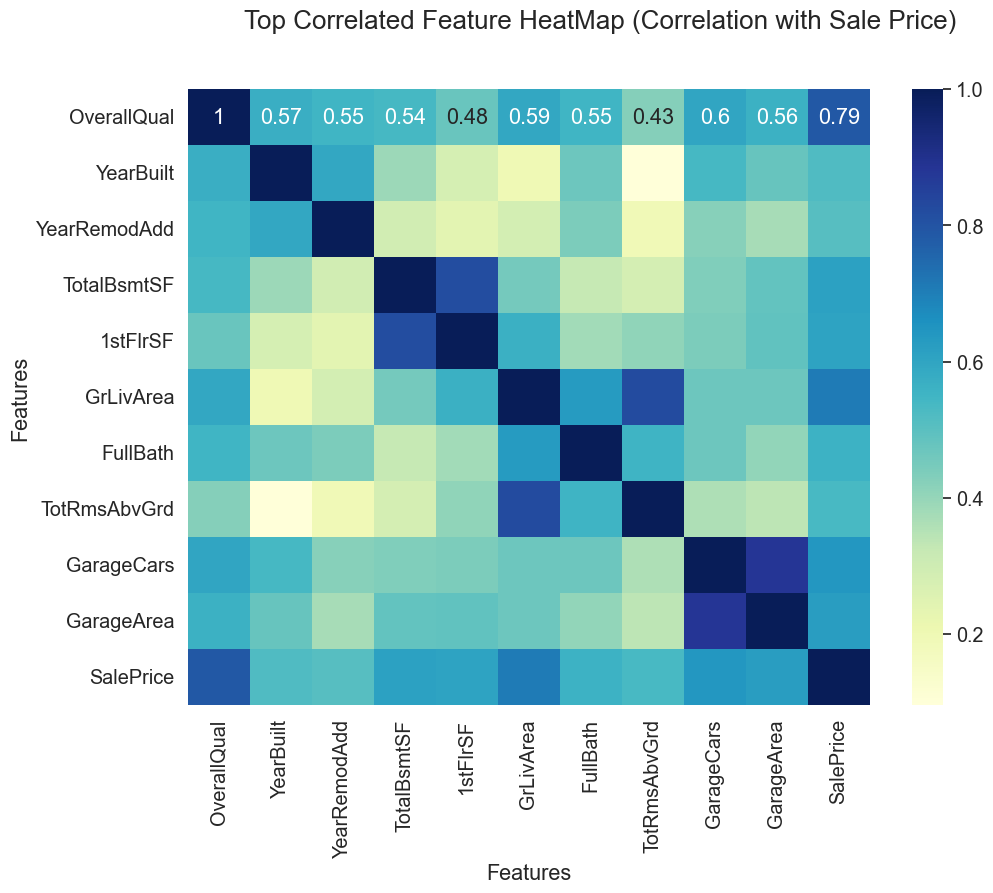

In [10]:
# most correlated features
numeric_columns = train.select_dtypes(include=['float64', 'int64']) # Select numeric columns
corr_mat = numeric_columns.corr()

sns.set(font_scale = 1.3)
plt.figure(figsize = (11,8))

top_corr = corr_mat.index[abs(corr_mat["SalePrice"])>0.5]
g = sns.heatmap(train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation with Sale Price)")
plt.xlabel("Features")
plt.ylabel("Features")

In [11]:
print("Correlation Values")
 # Select numeric columns
corr = train.select_dtypes(include=['float64', 'int64']).corr().drop('SalePrice')
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Correlation Values
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dt

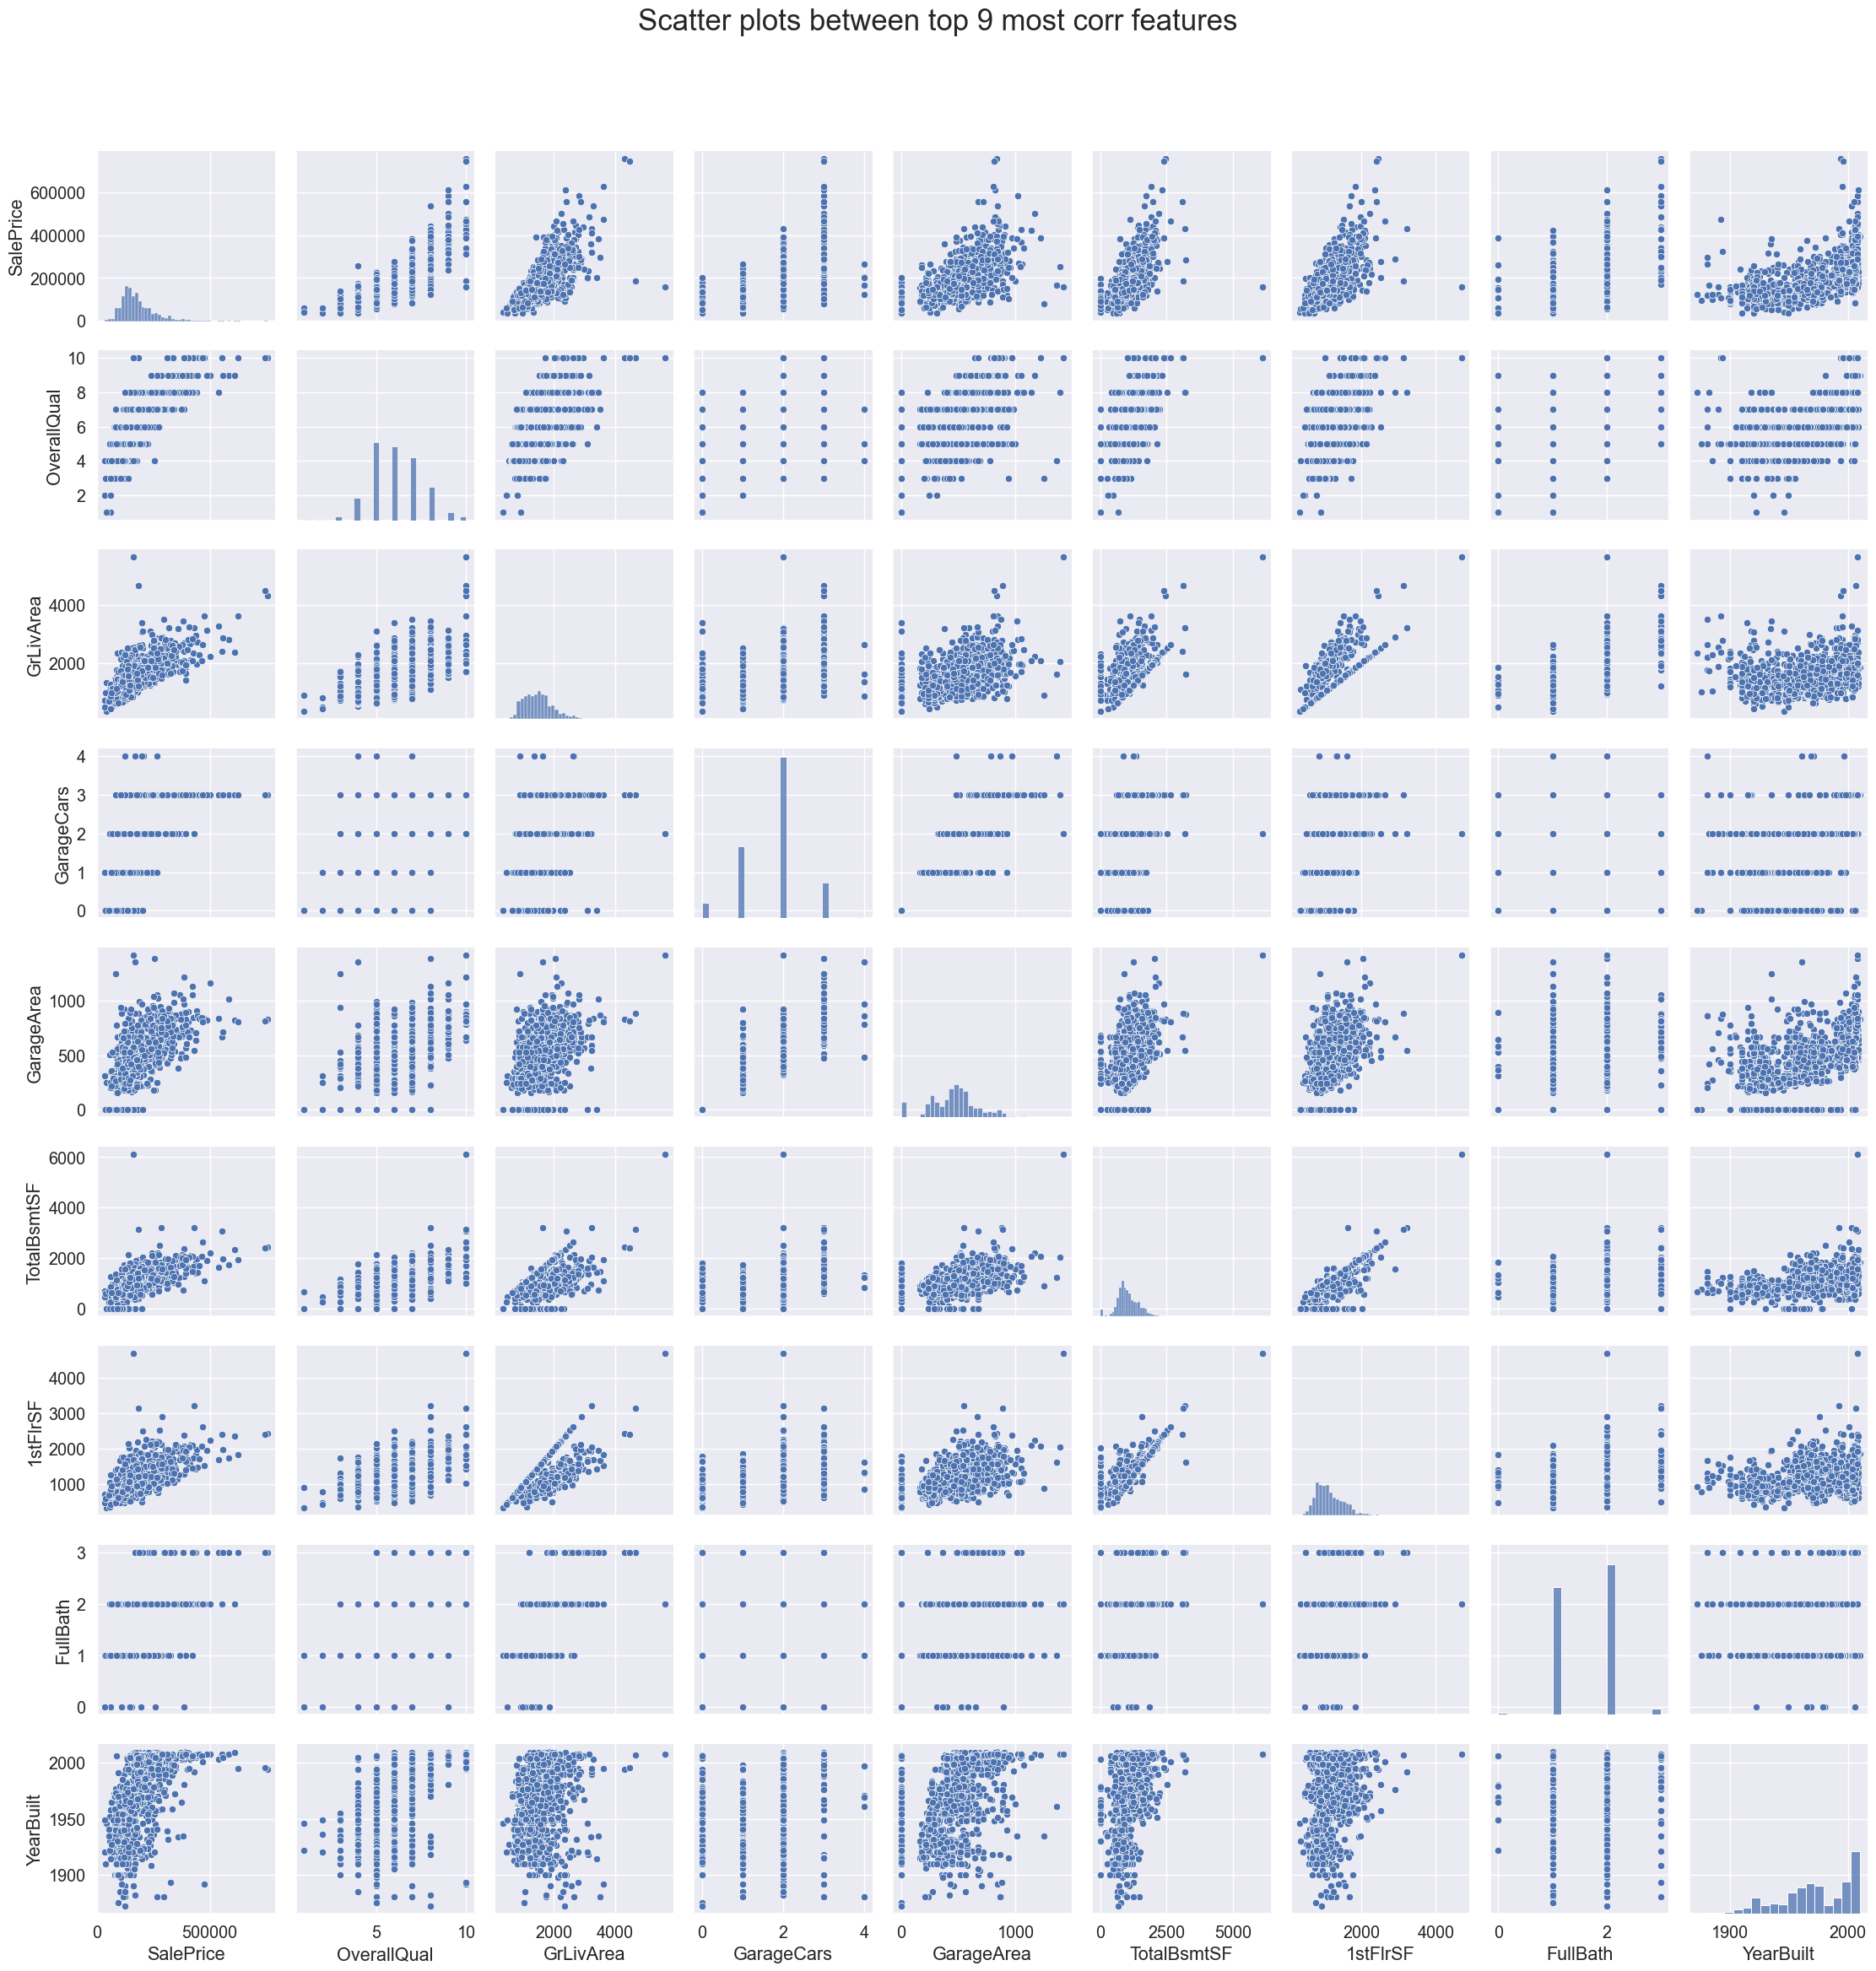

In [13]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']
sns_plot = sns.pairplot(train[cols])

plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

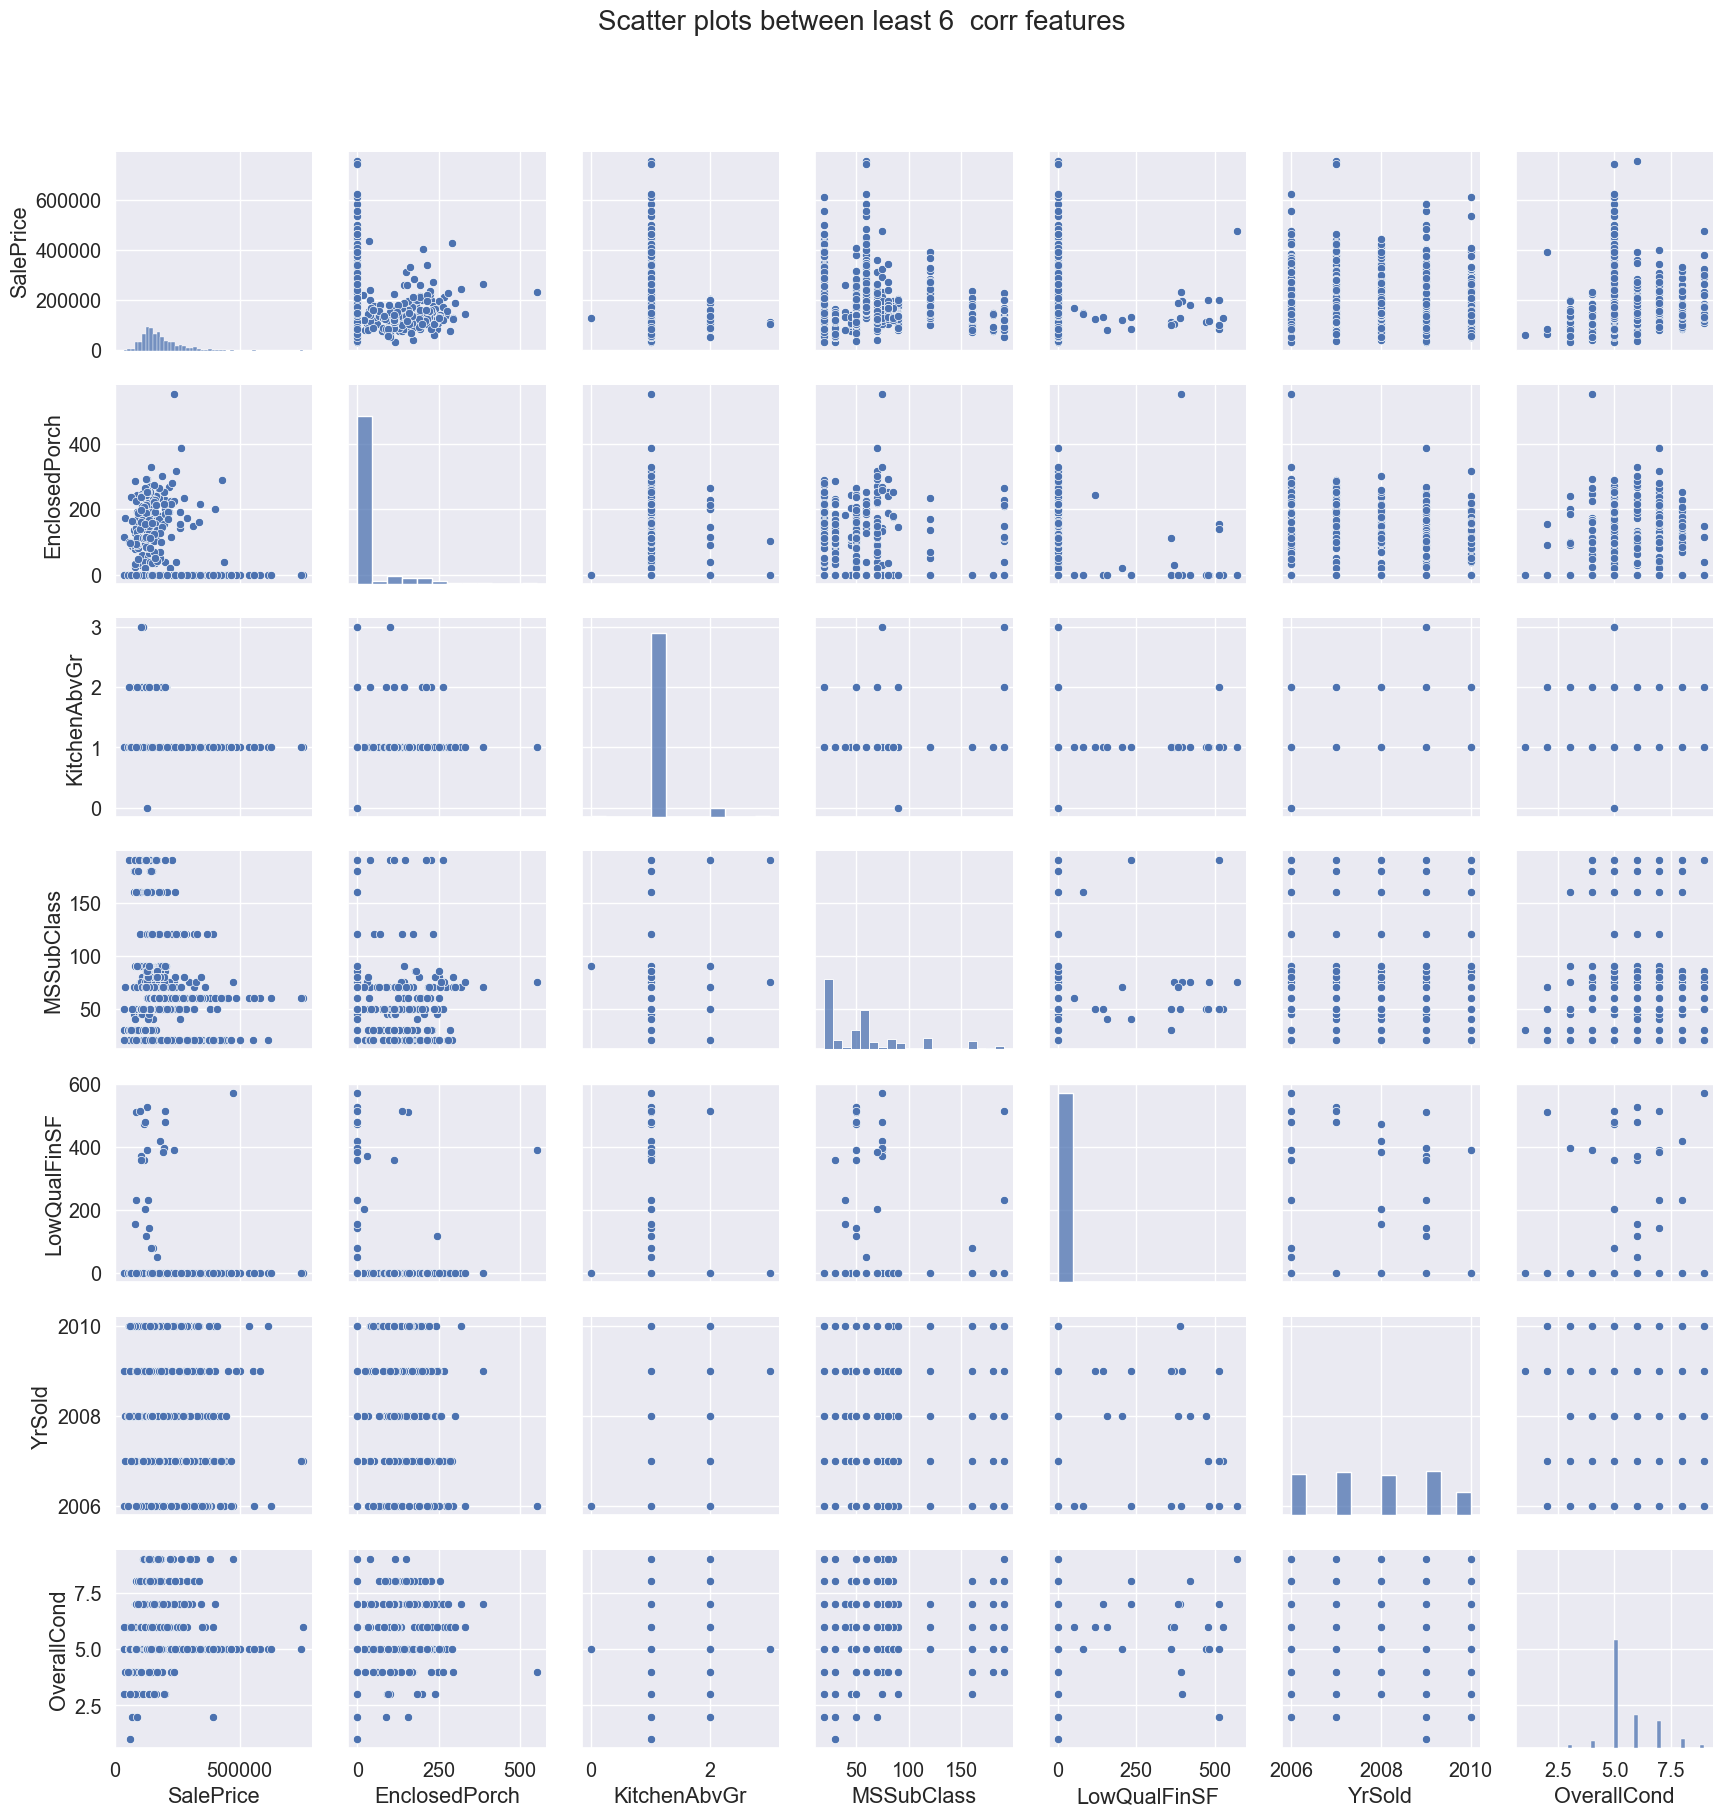

In [15]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(train[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

In [16]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = train[a], y = train['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

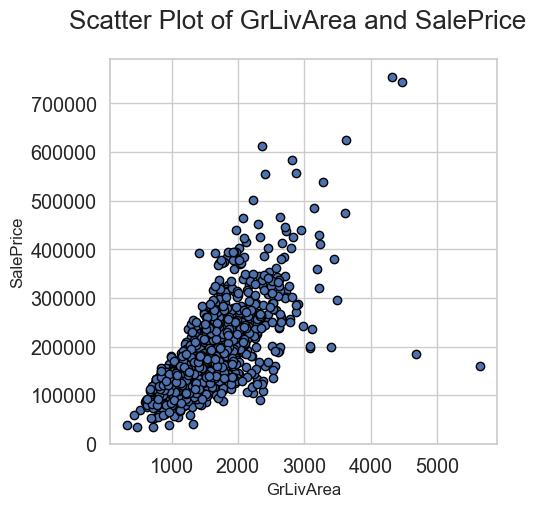

In [17]:
scatter_plot('GrLivArea')

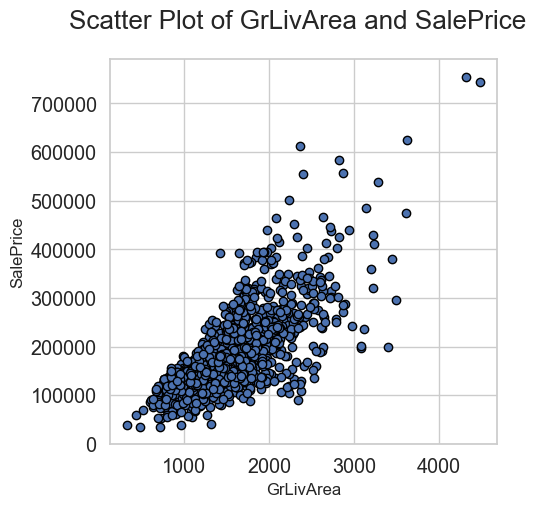

In [18]:
#Deleting outliers
train =  train.drop( train[( train['GrLivArea'] > 4000) & ( train['SalePrice']<300000)].index)

#Check the graphic again
scatter_plot('GrLivArea')

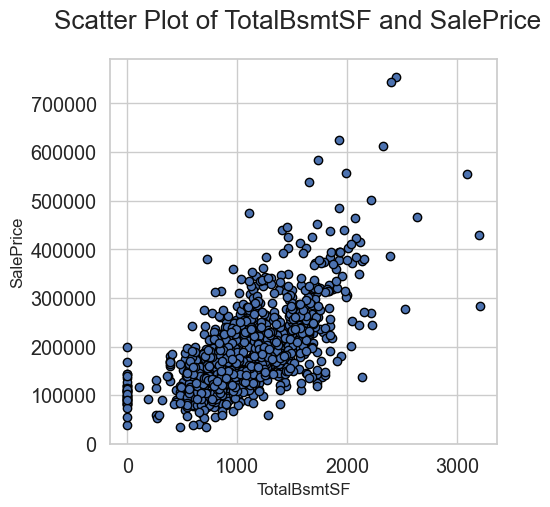

In [19]:
scatter_plot('TotalBsmtSF')

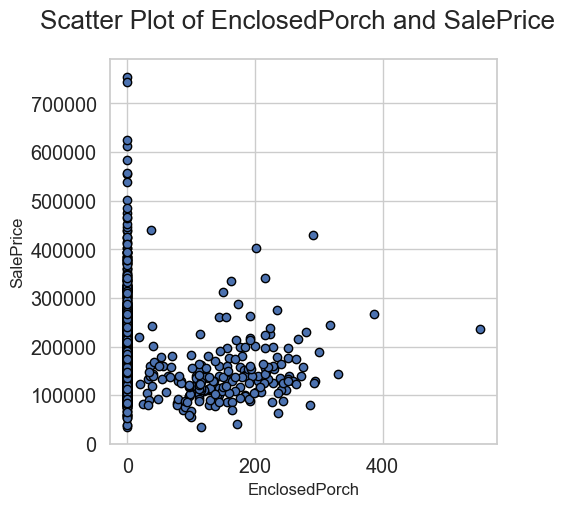

In [20]:
scatter_plot('EnclosedPorch')

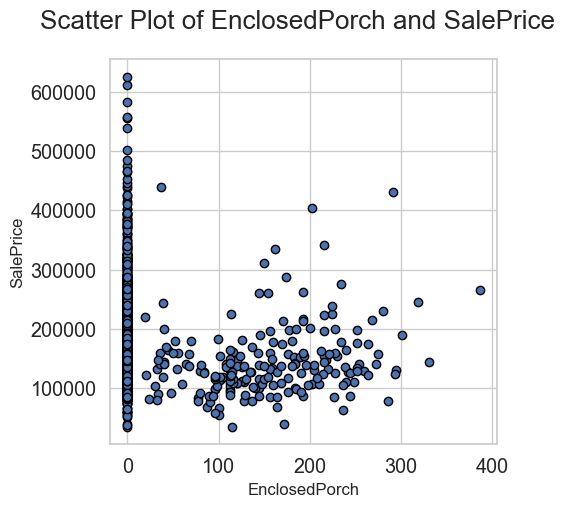

In [21]:
#Deleting outliers
train =  train.drop( train[( train['EnclosedPorch']>400)].index)

#Deleting outliers
train =  train.drop( train[( train['SalePrice']>700000)].index)

#check plot again
scatter_plot('EnclosedPorch')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

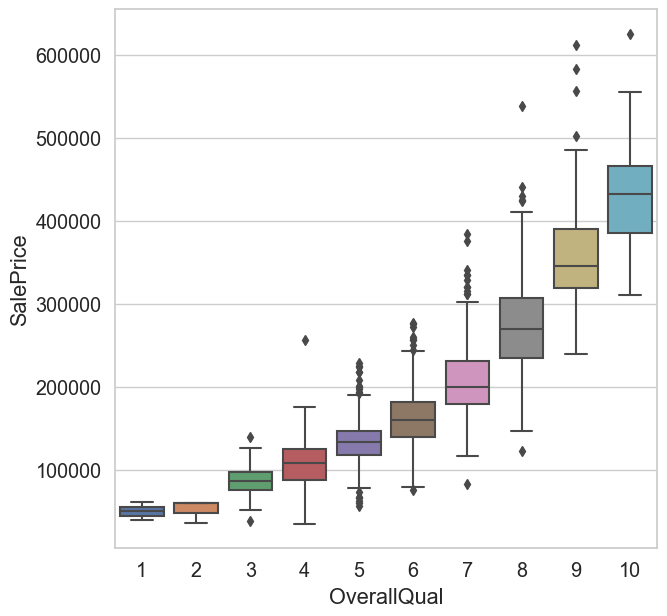

In [22]:
# plot a box plot for categorical feature : Overall Quality

fig = plt.figure(figsize=(7,7))
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
sns.boxplot(x = train['OverallQual'], y="SalePrice", data = data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

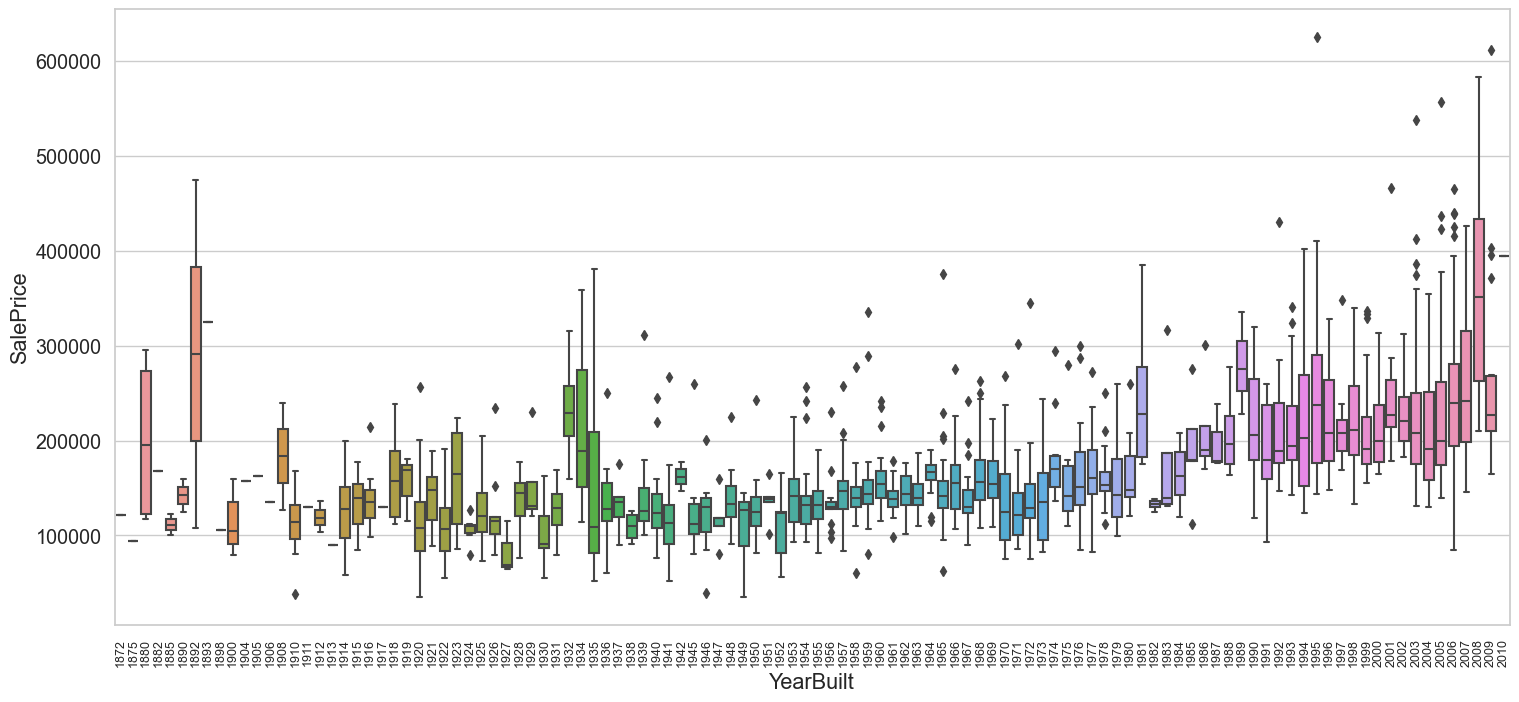

In [23]:
# plot a box plot for categorical feature : Year Built
fig = plt.figure(figsize=(18,8))

data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
sns.boxplot(x= train['YearBuilt'], y="SalePrice", data=data)
plt.xticks(rotation=90,fontsize= 9)

C:\Users\pc1\AppData\Local\Temp\ipykernel_2956\1780751891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


Skewness: 1.567473
Kurtosis: 3.888317


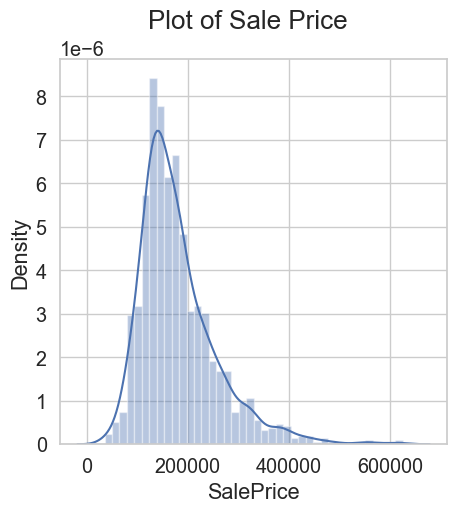

In [24]:
sns.distplot(train['SalePrice'])

plt.suptitle( "Plot of Sale Price")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

C:\Users\pc1\AppData\Local\Temp\ipykernel_2956\2581714537.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


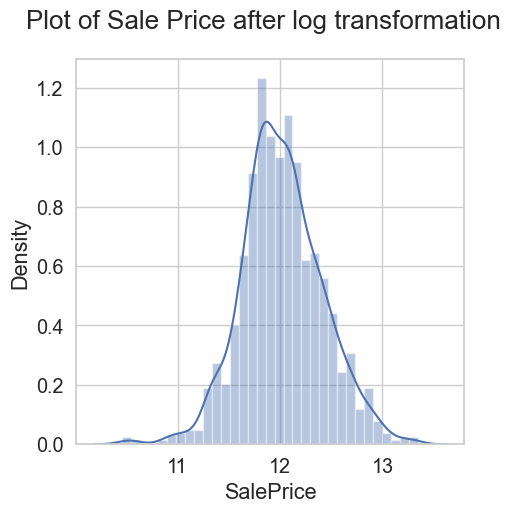

In [25]:
# applying log transformation to correct the positive skewness in the data
# taking logs means that errors in predicting expensive and cheap houses will affect the result equally

train['SalePrice'] = np.log(train['SalePrice'])
plt.suptitle("Plot of Sale Price after log transformation")
sns.distplot(train['SalePrice'])
plt.show()

In [26]:
train['SalePrice'].describe()

count    1455.000000
mean       12.021706
std         0.396112
min        10.460242
25%        11.774520
50%        12.001505
75%        12.272562
max        13.345507
Name: SalePrice, dtype: float64

In [27]:
train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1455, dtype: float64

In [28]:
train.shape

(1455, 81)

In [29]:
#function to see the missing data in a dataframe
def missing_data(df,n):    
    total = df.isnull().sum().sort_values(ascending=False)          # Total No of missing values
    percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)*100  # % of Missing values
    No_unique_val = df.nunique()                                   # No of unique values
    missing_data = pd.concat([total, percentage, No_unique_val], axis=1, 
                             keys=['Total No of missing val', '% of Missing val','No of unique val'], sort = False)
    
    print(missing_data.head(n))

In [30]:
#training data    
missing_data(train,20)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1451         99.725086                 2
MiscFeature                      1401         96.288660                 4
Alley                            1364         93.745704                 2
Fence                            1176         80.824742                 4
MasVnrType                        870         59.793814                 3
FireplaceQu                       690         47.422680                 5
LotFrontage                       259         17.800687               109
GarageYrBlt                        81          5.567010                97
GarageCond                         81          5.567010                 5
GarageType                         81          5.567010                 6
GarageFinish                       81          5.567010                 3
GarageQual                         81          5.567010                 5
BsmtFinType2                       38 

In [31]:
train['PoolQC'].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

In [32]:
#test data 
missing_data(test,34)

              Total No of missing val  % of Missing val  No of unique val
PoolQC                           1456         99.794380                 2
MiscFeature                      1408         96.504455                 3
Alley                            1352         92.666210                 2
Fence                            1169         80.123372                 4
MasVnrType                        894         61.274846                 3
FireplaceQu                       730         50.034270                 5
LotFrontage                       227         15.558602               115
GarageYrBlt                        78          5.346127                97
GarageQual                         78          5.346127                 4
GarageFinish                       78          5.346127                 3
GarageCond                         78          5.346127                 5
GarageType                         76          5.209047                 6
BsmtCond                           45 

In [33]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [34]:
# calculate total number of null values in training data
null_train = train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test.isnull().sum().sum()
print(null_test)

7812
7878


In [35]:
# calculate total number of null values in training data
null_train = train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test.isnull().sum().sum()
print(null_test)

7812
7878


In [36]:
# save the 'SalePrice'column as train_label
train_label = train['SalePrice'].reset_index(drop=True)

# # drop 'SalePrice' column from df_train 
df_train = train.drop(['SalePrice'], axis=1)
# # now df_train contains all training features

In [37]:
# function to HANDLE the missing data in a dataframe
def missing (df):
    
    # drop theses columns due to large null values or many same values
    df = df.drop(['Utilities','PoolQC','MiscFeature','Alley'], axis=1)
    
    # Null value likely means No Fence so fill as "None"
    df["Fence"] = df["Fence"].fillna("None") 
    
    # Null value likely means No Fireplace so fill as "None"
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # Lot frontage is the feet of street connected to property, which is likely similar to the neighbourhood houses, so fill Median value
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    
    # Null value likely means  typical(Typ)
    df["Functional"] = df["Functional"].fillna("Typ")
    
    # Only one null value so fill as the most frequent value(mode)
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])  
    
    # Only one null value so fill as the most frequent value(mode)
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # Very few null value so fill with the most frequent value(mode)
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    # Null value likely means no masonry veneer
    df["MasVnrType"] = df["MasVnrType"].fillna("None") #so fill as "None" (since categorical feature)
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)      #so fill as o
    
    # Only one null value so fill as the most frequent value(mode)
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    #MSZoning is general zoning classification,Very few null value so fill with the most frequent value(mode)
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    #Null value likely means no Identified type of dwelling so fill as "None"
    df['MSSubClass'] = df['MSSubClass'].fillna("None")
    
    # Null value likely means No Garage, so fill as "None" (since these are categorical features)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        df[col] = df[col].fillna('None')
    
    # Null value likely means No Garage and no cars in garage, so fill as 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)
    
    # Null value likely means No Basement, so fill as "None" (since these are categorical features)
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[col] = df[col].fillna('None')
    
    return df

In [38]:
train = missing(train)
test = missing(test)

In [39]:
# calculate total number of null values in training data
null_train = train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test.isnull().sum().sum()
print(null_test)

0
0


In [40]:
train.shape,test.shape

((1455, 77), (1459, 76))

In [41]:
def add_new_cols(df):
    
    df['Total_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] 
                             + (0.5 * df['BsmtHalfBath']))

    df['Total_Porch_SF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + 
                            df['ScreenPorch'] + df['WoodDeckSF'])

    df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    
    df['Total_Quality'] = df['OverallQual'] + df['OverallCond']
    
    return df

In [42]:
# add the new columns
train = add_new_cols(train)
test = add_new_cols(test)

In [43]:
train.shape,test.shape

((1455, 82), (1459, 81))

In [44]:
#training data
g1 = train.columns.to_series().groupby(train.dtypes).groups

In [45]:
{k.name: v for k, v in g1.items()}

{'int64': Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Total_SF',
        'Total_Porch_SF', 'Total_Square_Feet', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice',
        'Total_Bathrooms'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'M

In [46]:
g2 = test.columns.to_series().groupby(test.dtypes).groups

In [47]:
{k.name: v for k, v in g2.items()}

{'int64': Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'Total_Porch_SF', 'Total_Quality'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'Total_SF', 'Total_Bathrooms',
        'Total_Square_Feet'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', '

In [48]:
#get dummy values for categorical data
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.shape)
print(test.shape)

(1455, 294)
(1459, 279)


In [49]:
#align the training and testing data
train, test = train.align(test, join = 'inner', axis=1)

In [50]:
print(train.shape)
print(test.shape)

(1455, 279)
(1459, 279)


In [51]:
# calculate total number of null values in training data
null_train = train.isnull().sum().sum()
print(null_train)

# calculate total number of null values in test data
null_test = test.isnull().sum().sum()
print(null_test)

0
0


In [52]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [53]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,False,False,False,True,False,False,False,False,True,False
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,False,False,False,True,False,False,False,False,True,False


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Columns: 279 entries, Id to SaleCondition_Partial
dtypes: bool(237), float64(4), int64(38)
memory usage: 825.5 KB


In [55]:
X_test = test           # testing features

In [56]:
train["SalePrice"] = train_label

In [57]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,True,False,False,False,False,True,False,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,True,False,False,False,False,True,False,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,True,False,False,False,False,True,False,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,True,True,False,False,False,False,False,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,True,False,False,False,False,True,False,12.429216


In [58]:
train_set, valid_set = train_test_split(train,train_size= 0.7, shuffle=False)

X_train = train_set.drop(["SalePrice"], axis=1)  # training features
y_train = train_set["SalePrice"].copy()             # training label

X_valid = valid_set.drop(["SalePrice"], axis=1)  # testing features
y_valid = valid_set["SalePrice"].copy()               # testing label

In [59]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print()
print("X_valid shape: {}".format(X_valid.shape))
print("y_valid shape: {}".format(y_valid.shape))
print()
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1018, 279)
y_train shape: (1018,)

X_valid shape: (437, 279)
y_valid shape: (437,)

X_test shape: (1459, 279)


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1020
Columns: 279 entries, Id to SaleCondition_Partial
dtypes: bool(237), float64(4), int64(38)
memory usage: 577.6 KB


In [61]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 1021 to 1459
Columns: 279 entries, Id to SaleCondition_Partial
dtypes: bool(237), float64(4), int64(38)
memory usage: 247.9 KB


In [62]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1016    12.271345
1017    12.078239
1018    12.175613
1019    11.373663
1020    12.160029
Name: SalePrice, Length: 1018, dtype: float64

In [63]:
y_valid

1021    12.567237
1022    11.630709
1023    12.028739
1024    12.588191
1025    11.561716
          ...    
1455          NaN
1456          NaN
1457          NaN
1458          NaN
1459          NaN
Name: SalePrice, Length: 437, dtype: float64

In [64]:
null_t_x = X_train.isnull().sum().sum()
print(null_t_x)

null_t_y = y_train.isnull().sum().sum()
print(null_t_y)

null_v_x = X_valid.isnull().sum().sum()
print(null_v_x)

null_v_y = y_valid.isnull().sum().sum()
print(null_v_y)

0
0
0
5


In [65]:
np.where(np.isnan(y_valid))

(array([432, 433, 434, 435, 436], dtype=int64),)

In [66]:
# replace null values by mean value of y_valid column
mean = np.nanmean(y_valid)
y_valid = np.nan_to_num(y_valid,nan = mean)

In [67]:
#check again
np.where(np.isnan(y_valid))

(array([], dtype=int64),)

In [68]:
y_valid.dtype

dtype('float64')

In [69]:
print("Valid data shape:")
print(X_valid.shape, y_valid.shape)
print()

Valid data shape:
(437, 279) (437,)



In [70]:
# calculating cross validation score with scoring set to negative mean absolute error
def cross_validation(model):
    
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 12, scoring = "neg_mean_squared_error"))
    mean = np.mean(scores)
    print("Mean CV score: ",mean)

In [71]:
# function to calculate Root mean square error (RMSE)
def rmse(y_pred, y_train): 
    
    rmse_ = np.sqrt(metrics.mean_squared_error(y_pred,y_train))
    print("rmse: ", rmse_)

In [72]:
# function to plot actual vs predicited label
def actual_vs_pred_plot(y_train,y_pred):
    
    fig = plt.figure(figsize=(12,12))
    fig, ax = plt.subplots()
    
    ax.scatter(y_train, y_pred,color = "teal",edgecolor = 'lightblue')
    ax.plot([y_train.min(),y_train.max()], [y_train.min(), y_train.max()], 'k--',lw=0.2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.suptitle("Actual vs Predicted Scatter Plot",size=14)
    plt.show()

In [73]:
reg = linear_model.LinearRegression()

In [74]:
cross_validation(reg)

Mean CV score:  0.4760610261476023


In [75]:
#fit on training
model_reg = reg.fit(X_train, y_train)

#predict value of sale price on the training set
y1_pred = reg.predict(X_train)

#caculate root mean square error
rmse(y1_pred,y_train)

rmse:  0.3442402631732939


In [76]:
#predict value of sale price on the validation set
y1_pred_v = reg.predict(X_valid)

#caculate root mean square error
rmse(y1_pred_v, y_valid)

rmse:  0.4278999639061333


<Figure size 1200x1200 with 0 Axes>

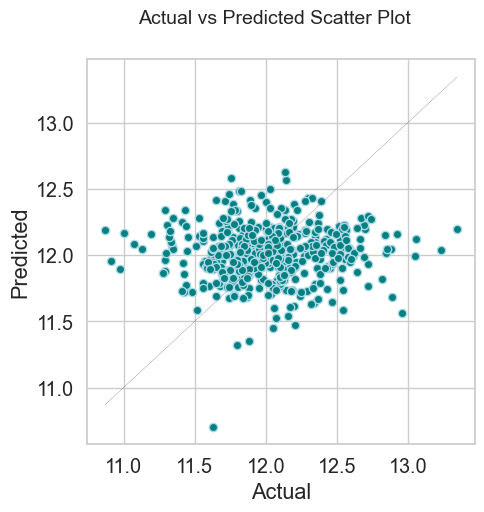

In [77]:
#plot
actual_vs_pred_plot(y_valid,y1_pred_v)

In [78]:
# to find the best value of alphas from this list, i will use RidgeCV
alphas_ = [ 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20]

# use robust scaler as unlike other scalers, the centering and scaling of ro bust scaler
#is based on percentiles and are therefore is not influenced by a few number of very large marginal outliers.

ridge = make_pipeline(MinMaxScaler(), linear_model.RidgeCV(alphas = alphas_, cv = 10))

In [80]:
cross_validation(ridge)

Mean CV score:  0.41714052431509


In [81]:
#fit
model_ridge = ridge.fit(X_train, y_train)

#predict value of sale price on the training set
y2_pred = ridge.predict(X_train)

#caculate root mean square error
rmse(y2_pred,y_train)

rmse:  0.3671907134997504


In [82]:
#predict value of sale price on the valid set
y2_pred_v = ridge.predict(X_valid)

#caculate root mean square error
rmse(y2_pred_v, y_valid)

rmse:  0.3958551510687607


<Figure size 1200x1200 with 0 Axes>

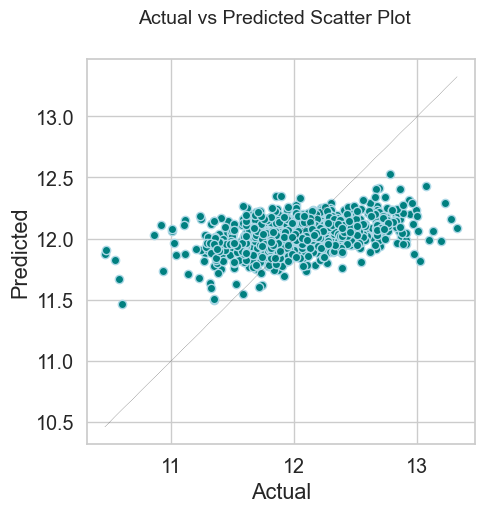

In [83]:
#plot
actual_vs_pred_plot(y_train,y2_pred)

In [84]:
# to find the best value of alphas from this list, i will use LassoCV
alpha2 = [0.0001, 0.0002, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

#use robust scaler so that predictions are not influenced by a few number of very large marginal outliers

lasso = make_pipeline(RobustScaler(), linear_model.LassoCV(alphas = alpha2, random_state=42,cv=12,max_iter=2000))

In [85]:
cross_validation(lasso)

C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.904315447740778, tolerance: 0.014062005916392917
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.60264258988687, tolerance: 0.013886829246530133
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.32871003847747, tolerance: 0.014074783611391048
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: 

Mean CV score:  0.43055413706474094


C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.224366961272345, tolerance: 0.014059197139630457
  model = cd_fast.enet_coordinate_descent_gram(


In [86]:
#fit
model_lasso = lasso.fit(X_train, y_train)

#predict value of quality on the training set
y3_pred = lasso.predict(X_train)

#caculate root mean square error
rmse(y3_pred,y_train)

C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.81467700996164, tolerance: 0.015151270252779389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.306293040748592, tolerance: 0.015366965177081287
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.108131412453886, tolerance: 0.015214986226185617
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617:

rmse:  0.3626317981085875


C:\Users\pc1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.01959127354606, tolerance: 0.01537208371433765
  model = cd_fast.enet_coordinate_descent_gram(


In [87]:
#predict value of sale price on the validation set
y3_pred_v = lasso.predict(X_valid)

#caculate root mean square error
rmse(y3_pred_v, y_valid)

rmse:  0.40601886792297576


<Figure size 1200x1200 with 0 Axes>

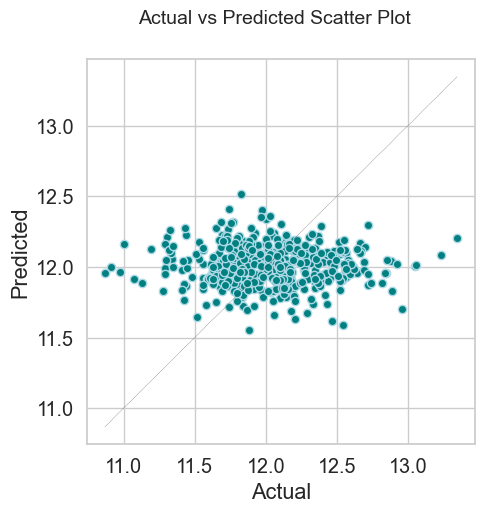

In [88]:
actual_vs_pred_plot(y_valid,y3_pred_v)

In [89]:
from sklearn.neighbors import KNeighborsRegressor

# N = 5 #
neigh = KNeighborsRegressor(n_neighbors = 5,
                            weights = 'uniform',
                            algorithm = 'auto',
                            leaf_size=25)
neigh.fit(X_train,y_train)

#predict value of sale price on the training set
y4_pred = neigh.predict(X_train)

#caculate root mean square error
rmse(y4_pred,y_train)

rmse:  0.348208683355032


In [90]:
# N = 7 #
neigh1 = KNeighborsRegressor(n_neighbors = 7,
                             weights = 'uniform',
                             leaf_size=25)
neigh1.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh1.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.364274874942262


In [91]:
# N = 9 #
neigh2 = KNeighborsRegressor(n_neighbors = 9,
                             weights = 'uniform',
                             leaf_size=25)
neigh2.fit(X_train,y_train)

#predict value of quality on the training set
y_pred = neigh2.predict(X_train)

#caculate root mean square error
rmse(y_pred,y_train)

rmse:  0.3719549895685812


In [92]:
#predict value of sale price on the validation set
y4_pred_v = neigh.predict(X_valid)

#caculate root mean square error
rmse(y4_pred_v, y_valid)

rmse:  0.40580593323083675


<Figure size 1200x1200 with 0 Axes>

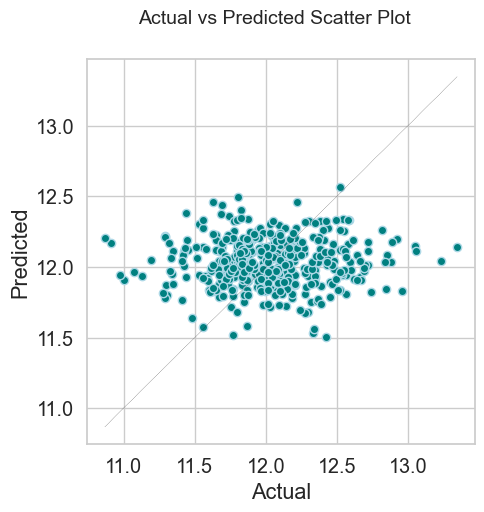

In [93]:
actual_vs_pred_plot(y_valid,y4_pred_v)

In [94]:
from sklearn import tree

In [95]:
# set max depth to 5
tree_regr1 = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf=5,random_state=42)

# set max depth to 9
tree_regr2 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_leaf=9,random_state=42)

#fit the traning data to a decision tree model
tree_regr11 = tree_regr1.fit(X_train,y_train)
tree_regr12 = tree_regr2.fit(X_train,y_train)

#predict value of sale price on the training set
y1 = tree_regr1.predict(X_train)
y2 = tree_regr2.predict(X_train)

In [96]:
cross_validation(tree_regr1)
cross_validation(tree_regr2)

Mean CV score:  0.4395978983163249
Mean CV score:  0.44496178692262256


In [97]:
#caculate root mean square error
rmse(y1,y_train)

rmse:  0.3133535369922589


In [98]:
rmse(y2,y_train)

rmse:  0.29914161206443945


In [99]:
#predict value of sale price on the validation set
y5_pred_v = tree_regr2.predict(X_valid)

#caculate root mean square error
rmse(y5_pred_v, y_valid)

rmse:  0.4505510435430728


<Figure size 1200x1200 with 0 Axes>

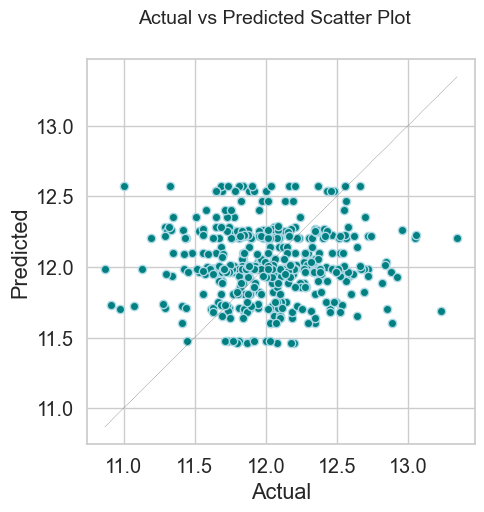

In [100]:
#plot
actual_vs_pred_plot(y_valid,y5_pred_v)

In [101]:
rforest = RandomForestRegressor(n_estimators=200,max_depth=13,random_state=42)

In [102]:
# grid search to find best value of C, gamma and epsilon
param_grid  = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [5,7,9,11,13,15,17], 
               'min_samples_leaf': [3,5,7,9,11,13,15]}

# set cross validation to 5
clf = GridSearchCV(rforest, param_grid, cv = 5, n_jobs = -2)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=13, n_estimators=200,
                                             random_state=42),
             n_jobs=-2,
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15, 17],
                         'min_samples_leaf': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [103]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 200}

In [110]:
rforest = RandomForestRegressor(n_estimators=1, max_depth=5, min_samples_leaf=3, random_state=42)

In [111]:
cross_validation(rforest)

Mean CV score:  0.4359083467102199


In [112]:
#fit
model_rforest = rforest.fit(X_train, y_train)

#predict value of sale price on the training set
y6_pred = rforest.predict(X_train)

#caculate root mean square error
rmse(y6_pred,y_train)

rmse:  0.3808353931633131


In [113]:
#predict value of sale price on the validation set
y6_pred_v = rforest.predict(X_valid)

#caculate root mean square error
rmse(y6_pred_v, y_valid)

rmse:  0.4086048602808471


<Figure size 1200x1200 with 0 Axes>

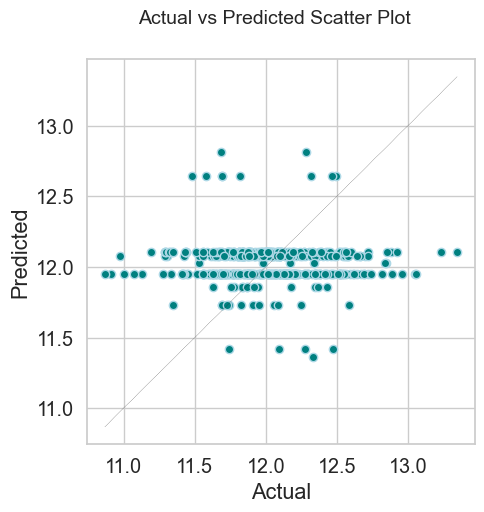

In [114]:
#plot
actual_vs_pred_plot(y_valid, y6_pred_v)

In [115]:
svr_basic = SVR(C = 10, gamma = 0.001)

In [117]:
# grid search to find best value of C, gamma and epsilon and default kernel 'rbf'
param_grid  = {'C': [5,7,10,15,20,30],'gamma': [0.001, 0.0001, 0.0011, 0.00011], 'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008, 0.009] }

# set cross validation to 5
clf = GridSearchCV(svr_basic, param_grid, cv = 10, n_jobs = -2)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(C=10, gamma=0.001), n_jobs=-2,
             param_grid={'C': [5, 7, 10, 15, 20, 30],
                         'epsilon': [0.1, 0.01, 0.001, 0.005, 0.007, 0.008,
                                     0.009],
                         'gamma': [0.001, 0.0001, 0.0011, 0.00011]})

In [118]:
clf.best_params_

{'C': 5, 'epsilon': 0.008, 'gamma': 0.0011}

In [119]:
#make final SVR model with best parameters found from grid search
svr = make_pipeline(MinMaxScaler(), SVR(C= 5, epsilon= 0.1, gamma=0.0011, kernel = "sigmoid"))

In [120]:
cross_validation(svr)

Mean CV score:  0.4098660535080391


In [121]:
#fit
model_svr = svr.fit(X_train, y_train)

#predict value of sale price on the training set
y7_pred = svr.predict(X_train)

#caculate root mean square error
rmse(y7_pred,y_train)

rmse:  0.38237753060854934


In [122]:
#predict value of sale price on the validation set
y7_pred_v = svr.predict(X_valid)

#caculate root mean square error
rmse(y7_pred_v, y_valid)

rmse:  0.39061180245493304


<Figure size 1200x1200 with 0 Axes>

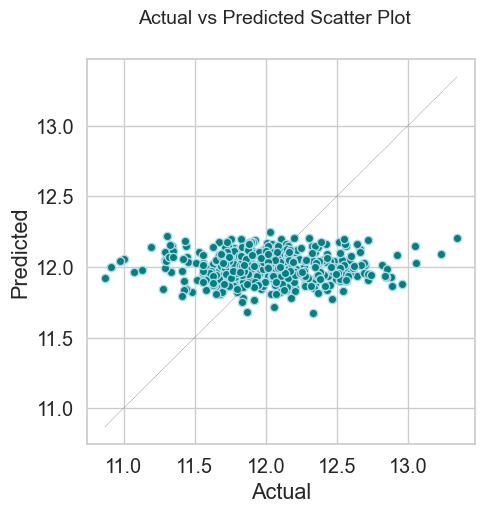

In [123]:
actual_vs_pred_plot(y_valid, y7_pred_v)

In [124]:
# set max depth to 4, min_samples_leaf to 15
gbr1 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,
                                min_samples_leaf=7, loss='huber', random_state =42) 


In [125]:
#set max depth to 7, min_samples_leaf to 10
gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 9,
                                min_samples_leaf=10, loss='huber', random_state =42) 

In [126]:
cross_validation(gbr1)
cross_validation(gbr2)

Mean CV score:  0.4091786109468039
Mean CV score:  0.410487848423162


In [127]:
#fit
model_gbr1 = gbr1.fit(X_train, y_train)
model_gbr2 = gbr2.fit(X_train, y_train)

#predict value of sale price on the training set
y_g1_pred = gbr1.predict(X_train)
y_g2_pred = gbr2.predict(X_train)

#caculate root mean square error
rmse(y_g1_pred,y_train)
rmse(y_g2_pred,y_train)

rmse:  0.1403918317391768
rmse:  0.1301107507212243


In [128]:
#predict value of sale price on the validation set
y8_pred_v = gbr2.predict(X_valid)

#caculate root mean square error
rmse(y8_pred_v, y_valid)

rmse:  0.4054752012878466


<Figure size 1200x1200 with 0 Axes>

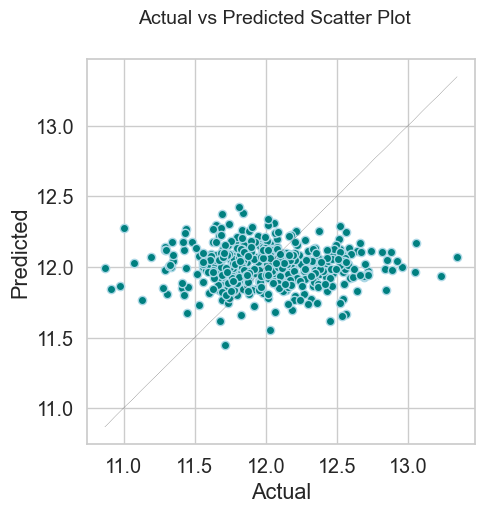

In [129]:
# plot for gbr2
actual_vs_pred_plot(y_valid, y8_pred_v)

In [130]:
# using Random Forest,Support Vector Regressor and Gradient Boosting to build a stack model because they have lower RMSE comparatively
estimators = [('Random Forest', rforest),
              ("Support Vector Regressor",svr),
              ("K",neigh),
              ("Ridge",ridge)
              ]

In [131]:
stacked = StackingRegressor(estimators = estimators, final_estimator = rforest, cv=5)

In [132]:
cross_validation(stacked)

Mean CV score:  0.4319454318847384


In [133]:
#fit
model_stack = stacked.fit(X_train, y_train)

#predict value of sale price on the training set
y9_pred = stacked.predict(X_train)

#caculate root mean square error
rmse(y9_pred,y_train)

rmse:  0.4092465587086651


In [134]:
#predict value of sale price on the validation set
y9_pred_v = stacked.predict(X_valid)

#caculate root mean square error
rmse(y9_pred_v, y_valid)

rmse:  0.3830246216822122


<Figure size 1200x1200 with 0 Axes>

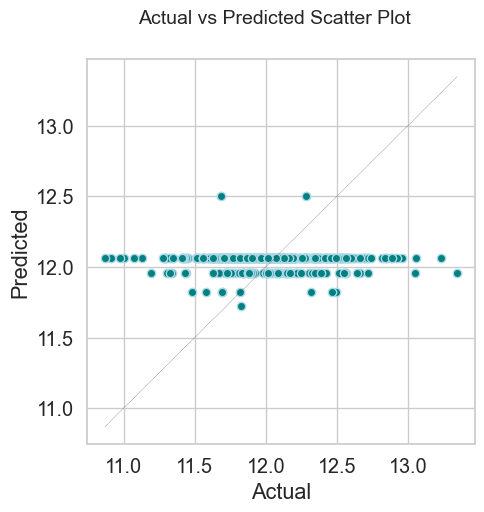

In [135]:
# plot
actual_vs_pred_plot(y_valid,y9_pred_v)

In [136]:
csv_path = "sample_submission.csv"
df_sub = pd.read_csv(csv_path, sep = ',')  

In [137]:
df_sub.shape

(1459, 2)

In [138]:
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [139]:
X_test.shape

(1459, 279)

In [140]:
#predict value of sale price on the training set
y_final_pred = stacked.predict(X_test)

y_final_pred

array([12.06575395, 12.06575395, 12.06575395, ..., 12.06575395,
       12.06575395, 12.06575395])

In [141]:
#undo the log tranformation to get predictions in terms of original label
predictions = np.expm1(y_final_pred)
print(predictions)

[173815.24446221 173815.24446221 173815.24446221 ... 173815.24446221
 173815.24446221 173815.24446221]


In [143]:
submit

""
